In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/Projects/GSSoC/Logistic Regression - Credit Card Fraud/")

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error

In [5]:
df = pd.read_csv("card_transdata.csv")

In [6]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [7]:
df.columns.values

array(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


### Checking for Null values

In [9]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [10]:
# No null values present

#Exploratory Data Analysis

In [11]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


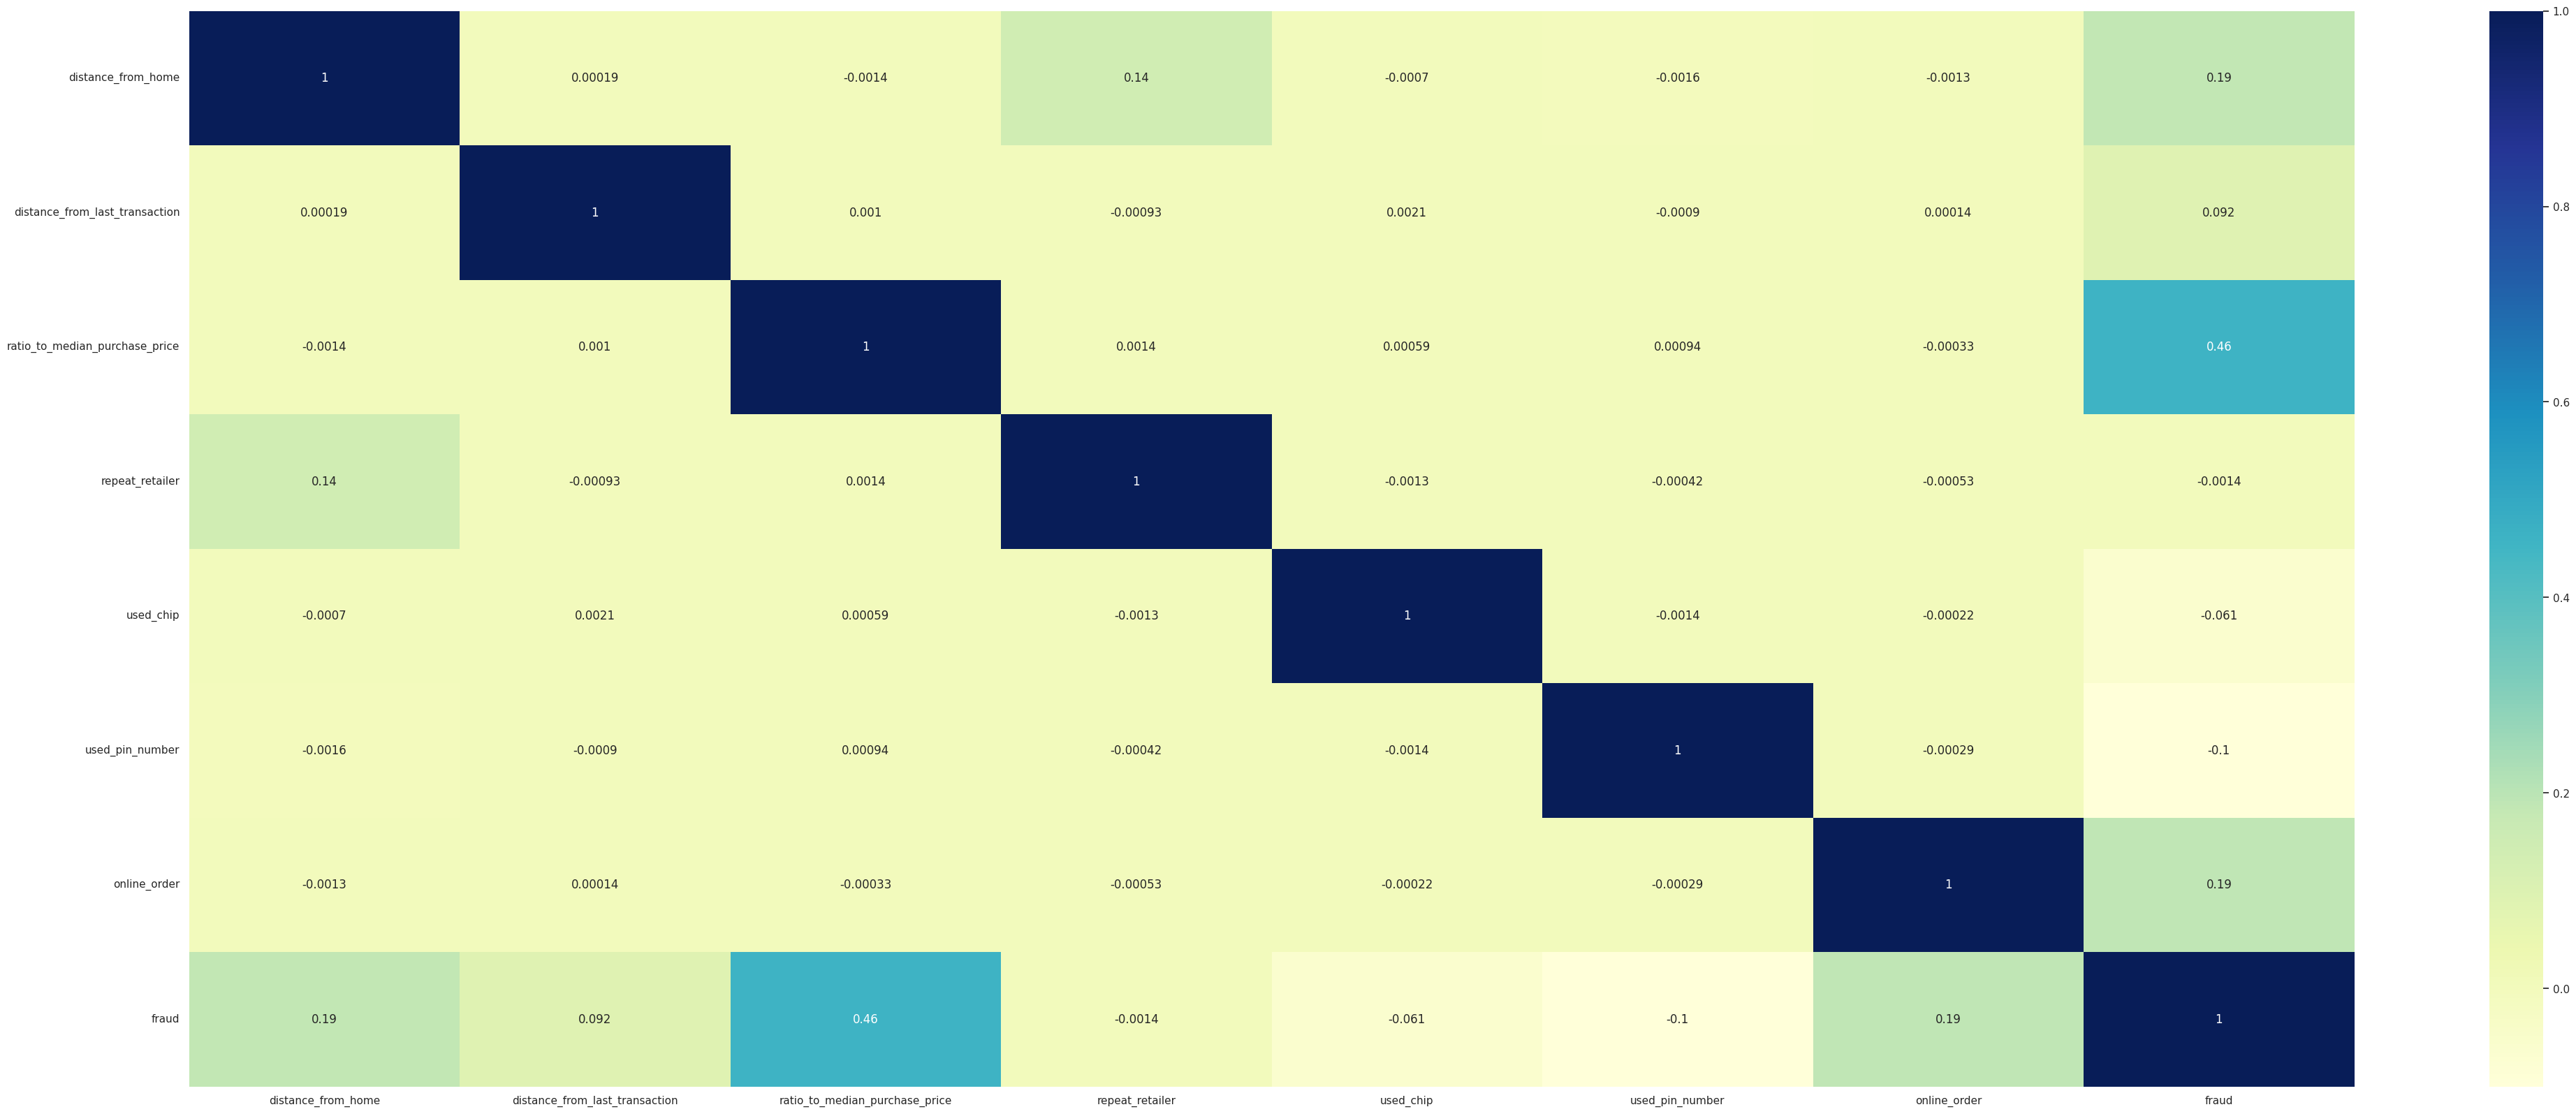

In [12]:
plt.figure(figsize= (50, 20))
sns.heatmap(df.corr(), annot= True, cmap='YlGnBu')
plt.show()

### 'ratio_to_median_purchase_price' is clearly our most important feature over here, because of its high correlation to the target variable 'fraud'

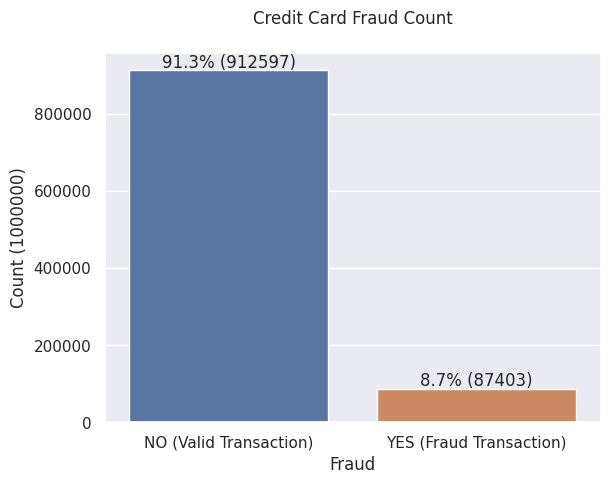

In [13]:
ax = sns.countplot(x='fraud', data=df)
ax.set_xticklabels(['NO (Valid Transaction)', 'YES (Fraud Transaction)'])

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format((height/total) * 100)
    count = int(height)
    ax.annotate(f'{percentage} ({count})', (p.get_x() + p.get_width() / 2., height), ha='center', va='top', xytext=(0, 12), textcoords='offset points')

plt.title('Credit Card Fraud Count\n')
plt.xlabel('Fraud')
plt.ylabel(f'Count ({int(total)})')
plt.show()

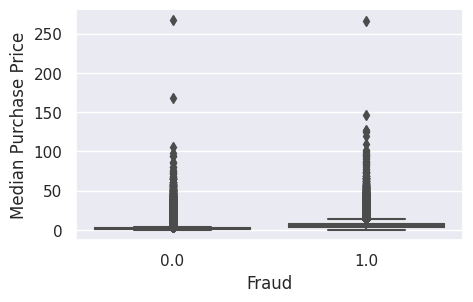

In [25]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='fraud', y='ratio_to_median_purchase_price', data = df)
plt.ylabel('Median Purchase Price')
plt.xlabel('Fraud')
plt.show()

# Splitting Dependent and Independent Variables

In [26]:
X = df.drop('fraud', axis=1)
Y = df['fraud']

# Splitting into Train and Test Datasets

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

# Training the Model

In [32]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'lbfgs', max_iter = 200)
clf.fit(X_train, Y_train)

LogisticRegression(max_iter=200)

# Making Predictions

In [33]:
Y_pred = clf.predict(X_test)

# Evaluating Model

In [36]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1-score: {:.2%}".format(f1))

Accuracy: 95.86%
Precision: 89.11%
Recall: 59.90%
F1-score: 71.64%
